In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

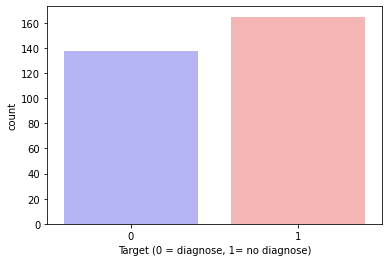

In [5]:
sns.countplot(x='target', data=df, palette='bwr')
plt.xlabel("Target (0 = diagnose, 1= no diagnose)")
plt.show()

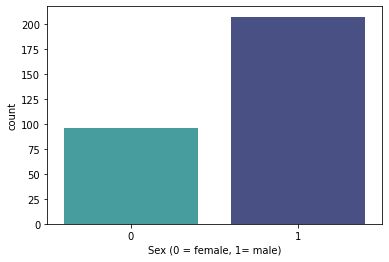

In [6]:
sns.countplot(x='sex', data=df, palette='mako_r')
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

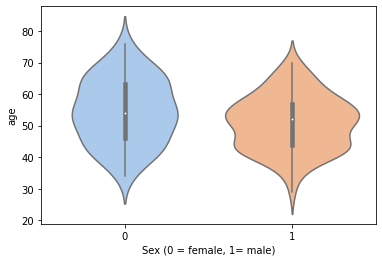

In [7]:
# Patient age distribution
sns.violinplot(x=df[df['target']==1]['sex'],y=df[df['target']==1]['age'], palette='pastel')
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [8]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


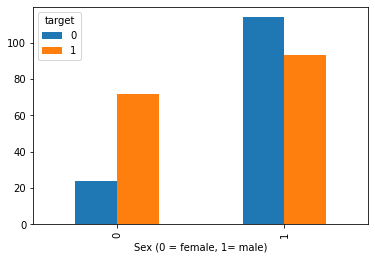

In [9]:
pd.crosstab(df.sex, df.target).plot(kind='bar')
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [12]:
# one-hot encoder
cp = pd.get_dummies(df['cp'], prefix='cp')
ca = pd.get_dummies(df['ca'], prefix='ca')
thal = pd.get_dummies(df['thal'], prefix='thal')
df = pd.concat([df, cp, ca, thal], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,0,1,0


In [13]:
df = df.drop(['cp', 'ca', 'thal'], axis=1)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,...,1,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,...,0,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,...,0,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,...,0,1,0,0,0,0,0,0,1,0


In [14]:
label = df['target']
features = df.drop('target', axis=1)

In [15]:
# MinMax
features = (features - np.min(features)) / (np.max(features) - np.min(features)).values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size = 0.2,random_state=0)

In [17]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
print(lr.score(x_test,y_test)*100)

86.88524590163934


83.60655737704919


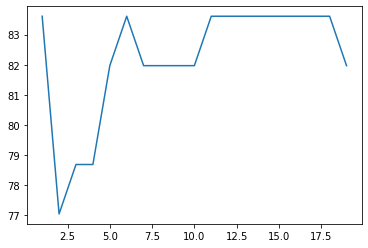

In [18]:
acc_results = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
#     print(knn.score(x_test, y_test)*100)
    acc_results.append(knn.score(x_test, y_test)*100)
plt.plot(range(1, 20), acc_results)
print(max(acc_results))

In [19]:
svm = SVC(random_state=1)
svm.fit(x_train, y_train)
print(svm.score(x_test, y_test)*100)

80.32786885245902
